In [2]:
from PIL import Image
import math
import os

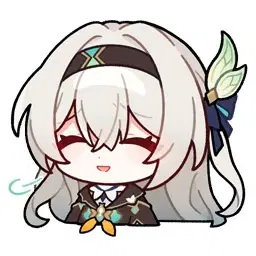

In [3]:
input_img = Image.open('misc images/firefly.webp')
display(input_img)

In [4]:
## not using

def get_dominant_color(pil_img, palette_size=5):
    # Resize image to speed up processing
    img = pil_img.copy()
    img.thumbnail((100, 100))

    # Reduce colors (uses k-means internally)
    paletted = img.convert('P', palette=Image.ADAPTIVE, colors=palette_size)

    # Find the color that occurs most often
    palette = paletted.getpalette()
    color_counts = sorted(paletted.getcolors(), reverse=True)
    palette_index = color_counts[0][1]
    dominant_color = palette[palette_index*3:palette_index*3+3]

    return dominant_color

In [5]:
## User selections
detail = 20
top = True

In [6]:
def dom_color(img):
    img = img.resize((1, 1), resample=0)
    dominant_color = img.getpixel((0, 0))

    return dominant_color

In [7]:
print(dom_color(input_img))

(124, 83, 83)


In [8]:
def euclidean_dist(color1, color2):
    return math.sqrt((color1[0] - color2[0]) ** 2 + (color1[1] - color2[1]) ** 2 + (color1[2] - color2[2]) ** 2)

In [9]:
# test

# improvement idea
# file is ordered by color 
# forloop starts at closest location 
def find_closest_img(input_img, directory):
    lowest = 1000
    lowest_img = ""
    for filename in os.scandir(directory):
        curr = euclidean_dist(dom_color(input_img), dom_color(Image.open(filename)))
        if (curr < lowest):
            lowest = curr
            print(lowest)
            lowest_img = filename
        

    return(lowest_img)



In [10]:
copy = input_img.copy()
#copy_arr = []
detail = 3
counter = 0
dict = {}


for i in range(0, copy.height, detail):
    for j in range(0, copy.width, detail):
        #copy_arr.append(copy.crop((j, i, j+detail, i+detail)))
        crop = copy.crop((j, i, j+detail, i+detail))


        closest_img = find_closest_img(crop, "all")
        Image.Image.paste(copy, Image.open(closest_img).resize((detail, detail)), (j, i, j+detail, i+detail))


        name = ""
        #if (i < copy.height - detail and j < copy.width - detail):
        file_str = str(closest_img.name)
        ind = file_str.index("_%28")

        name = file_str[0:ind] 
        print(name)

        if (dict.get(name) == None):
            dict.update({name: 1})
        else:
            dict[name] += 1
            #dict.setdefault(name, dict.get(name) + 1)

        
        
        #ind = closest_img
        #.index("_%28")
        #closest_img = ind.slice(ind)
        counter += 1
        print("progress: " + str(counter) + "/" + str((((copy.width)/detail) * ((copy.height)/detail))))




251.4935386843964
198.63534428696218
135.3883303686104
43.30127018922193
18.867962264113206
14.2828568570857
Snow
progress: 1/104.8576
251.4935386843964
198.63534428696218
135.3883303686104
43.30127018922193
18.867962264113206
14.2828568570857
Snow
progress: 2/104.8576
251.4935386843964
198.63534428696218
135.3883303686104
43.30127018922193
18.867962264113206
14.2828568570857
Snow
progress: 3/104.8576
251.4935386843964
198.63534428696218
135.3883303686104
43.30127018922193
18.867962264113206
14.2828568570857
Snow
progress: 4/104.8576
251.4935386843964
198.63534428696218
135.3883303686104
43.30127018922193
18.867962264113206
14.2828568570857
Snow
progress: 5/104.8576
251.4935386843964
198.63534428696218
135.3883303686104
43.30127018922193
18.867962264113206
14.2828568570857
Snow
progress: 6/104.8576
251.4935386843964
198.63534428696218
135.3883303686104
43.30127018922193
18.867962264113206
14.2828568570857
Snow
progress: 7/104.8576
251.4935386843964
198.63534428696218
135.3883303686104


In [13]:
print(dict)

{'Snow': 41, 'Black_Concrete': 28, 'Quartz_Bricks': 19, 'Block_of_Quartz': 5, 'Brown_Terracotta': 1, 'Soul_Soil': 2, 'Light_Gray_Concrete': 1, 'Emerald_Ore': 1, 'Powder_Snow': 1, 'Tuff': 1, 'Calcite': 1, 'Dead_Bubble_Coral_Block': 1, 'Blue_Terracotta': 1, 'Netherrack': 1, 'Purple_Terracotta': 1, 'Chiseled_Nether_Bricks': 1, 'Mushroom_Stem': 2, 'Light_Gray_Concrete_Powder': 2, 'Black_Terracotta': 2, 'Crying_Obsidian': 1, 'Smooth_Stone': 1, 'Deepslate_Coal_Ore': 1, 'Cobblestone': 2, 'Prismarine_Bricks': 1, 'Light_Gray_Wool': 1, 'Dead_Horn_Coral_Block': 1, 'Smooth_Stone_Slab': 1}


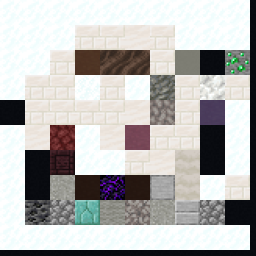

In [12]:
display(copy)